### Data Analysis Project 

###  An exploratory Analysis of Chicago Crime Data in 2021

## Libraries Used

   ### pandas
   ### matplotlib
   ### seaborn
   ### numpy
   ### datetime

### Size --> 48.1 MB

### Link -->  https://www.kaggle.com/datasets/salikhussaini49/chicago-crimes?select=Chicago_Crimes_2021.csv


### Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>
    

### Points 
<ul>
<li><a href="#q1">1. Top Crimes in Chicago in the year 2021</a></li>
<li><a href="#q2">2. Most Occurring Top 5 Crimes in Chicago in 2021</a></li>
<li><a href="#q3">3. Modifying the Date Column to a Pythonic Format</a></li>
<li><a href="#q4">4. Create a new column Month</a></li>
<li><a href="#q5">5. The probability of arrest of Chicago</a></li>
<li><a href="#q6">6. Distribution of arrests across the months</a></li>
<li><a href="#q7">7. Crime vs Time</a></li>
<li><a href="#q8">8. What are the most unsafest hours ?</a></li>
<li><a href="#q9">9. Is your house safe from a burglary during the day ?</a></li>
<li><a href="#q10">10. Visualize a Crime Pattern for 24 hours? </a></li>
<li><a href="#q11">11. Crime vs Locations</a></li>
<li><a href="#q12">12. Most Common Occurences per District</a></li>
<li><a href="#q13">13. Which region is a given Crime concentrated in ?</a></li>
<li><a href="#q14">14. Visualizing Narcotics (To get an understanding of the most prevalent type of drugs in the area)</a></li>
<li><a href="#q15">15. Visualizing With Heatmaps</a></li>
<li><a href="#q16">16. Classifying Crime Hotspots</a></li>
<li><a href="#q18">18. Using Supervised Machine Learning to Predict Crime Hotspots</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction


Since the beginning of humanity, crime has been a pervasive antisocial behaviour in human civilization. Numerous eminent authors, academics, and journalists have claimed that crime has a pattern. The police force would be significantly strengthened if they were aware of these crime trends and criminal behaviour. Through this initiative, we hope to analyse criminal behaviour trends and uncover information about a number of issues that might help police better understand criminal behaviour.

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling

- We will load here the data

- check for cleanliness 

- trim and clean the dataset for analysis.

# 2.1 Data Gathering

In [2]:
# put dataset --> dataframe
df = pd.read_csv('Chicago_Crimes_2021.csv')
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12445124,JE328077,08/05/2021 10:00:00 PM,033XX S LEAVITT ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,0,0,...,25.0,59.0,05,1162228.0,1882544.0,2021,08/12/2021 05:02:52 PM,41.833362,-87.680254,"(41.833362337, -87.680254373)"
1,12541099,JE445417,11/14/2021 10:58:00 PM,003XX N LAVERGNE AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,1,0,...,28.0,25.0,15,1142984.0,1901704.0,2021,11/21/2021 03:48:03 PM,41.886320,-87.750388,"(41.886319707, -87.750387937)"
2,12344992,JE204888,04/16/2021 12:00:00 AM,011XX W 50TH ST,0820,THEFT,$500 AND UNDER,APARTMENT,0,0,...,20.0,61.0,06,1169689.0,1871646.0,2021,04/23/2021 04:51:47 PM,41.803298,-87.653195,"(41.8032982, -87.653195042)"
3,12345838,JE205622,03/03/2021 06:20:00 PM,012XX N WELLS ST,0820,THEFT,$500 AND UNDER,STREET,0,0,...,2.0,8.0,06,1174488.0,1908479.0,2021,04/23/2021 04:49:41 PM,41.904265,-87.634496,"(41.904265132, -87.634495504)"
4,12444222,JE326942,08/05/2021 11:00:00 AM,044XX N BROADWAY,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,...,46.0,3.0,08B,1168547.0,1929701.0,2021,08/12/2021 05:02:52 PM,41.962630,-87.655702,"(41.962630057, -87.655702088)"


# 2.2 Data Assessment

In [3]:
#Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207914 entries, 0 to 207913
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    207914 non-null  int64  
 1   Case Number           207914 non-null  object 
 2   Date                  207914 non-null  object 
 3   Block                 207914 non-null  object 
 4   IUCR                  207914 non-null  object 
 5   Primary Type          207914 non-null  object 
 6   Description           207914 non-null  object 
 7   Location Description  207071 non-null  object 
 8   Arrest                207914 non-null  int64  
 9   Domestic              207914 non-null  int64  
 10  Beat                  207914 non-null  int64  
 11  District              207914 non-null  float64
 12  Ward                  207903 non-null  float64
 13  Community Area        207914 non-null  float64
 14  FBI Code              207914 non-null  object 
 15  

In [4]:
# The dimensionality of the train data.
df.shape

(207914, 22)

In [5]:
# Summary 
df.describe()

,ID,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.079140e+05,207914.000000,207914.000000,207914.000000,207914.000000,207903.000000,207914.000000,2.029020e+05,2.029020e+05,207914.0,202902.000000,202902.000000
mean,1.237804e+07,0.124393,0.216085,1151.042647,11.281414,23.141845,37.098093,1.165116e+06,1.885757e+06,2021.0,41.842103,-87.669612
std,7.751009e+05,0.330030,0.411574,699.229620,6.988737,13.920027,21.645065,1.655394e+04,3.201057e+04,0.0,0.088035,0.060252
min,2.569900e+04,0.000000,0.000000,111.000000,1.000000,1.000000,1.000000,1.091242e+06,1.813909e+06,2021.0,41.644608,-87.939733
25%,1.234293e+07,0.000000,0.000000,611.000000,6.000000,10.000000,23.000000,1.153356e+06,1.858102e+06,2021.0,41.765967,-87.712331
50%,1.242542e+07,0.000000,0.000000,1031.000000,10.000000,24.000000,32.000000,1.166968e+06,1.891276e+06,2021.0,41.857199,-87.662955
75%,1.250653e+07,0.000000,0.000000,1722.000000,17.000000,34.000000,55.000000,1.176822e+06,1.909216e+06,2021.0,41.906683,-87.626743
max,1.286799e+07,1.000000,1.000000,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951499e+06,2021.0,42.022548,-87.524529


In [6]:
# Features
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [7]:
#Duplication
sum(df.duplicated())

0

# 2.3 Data Cleaning

# Dealing With Missing Values

In [8]:
# The total missing values in the dataset !!?
print("The number of missing values: ", df.isna().sum().sum())

The number of missing values:  25914


In [9]:
# How many number of null entries per feature ?
missing_values = list(df.isna().sum())  # list of the number of missing values in each column
cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values
print("The number of missing values -->  per feature is : ")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Making a custom dataframe from dict d
missing_vals.head()

The number of missing values -->  per feature is : 


,Others,Location Description,Ward,X Coordinate,Y Coordinate,Latitude,Longitude,Location
Missing Values,0,843,11,5012,5012,5012,5012,5012


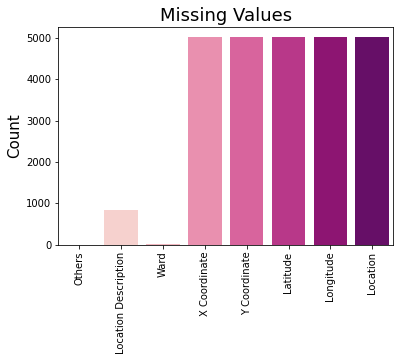

In [10]:
# Plotting the missing values in the dataset
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="RdPu")
plt.xticks(rotation=90)
plt.title("Missing Values", fontdict = {'fontsize': 18})
plt.ylabel("Count", fontdict={'fontsize': 15})
plt.show()

In [11]:
# The simplest cleaning technique here would be to drop all the rows with atleast one missing value --> as every feature in the dataset is important 
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202264 entries, 0 to 207903
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    202264 non-null  int64  
 1   Case Number           202264 non-null  object 
 2   Date                  202264 non-null  object 
 3   Block                 202264 non-null  object 
 4   IUCR                  202264 non-null  object 
 5   Primary Type          202264 non-null  object 
 6   Description           202264 non-null  object 
 7   Location Description  202264 non-null  object 
 8   Arrest                202264 non-null  int64  
 9   Domestic              202264 non-null  int64  
 10  Beat                  202264 non-null  int64  
 11  District              202264 non-null  float64
 12  Ward                  202264 non-null  float64
 13  Community Area        202264 non-null  float64
 14  FBI Code              202264 non-null  object 
 15  

In [12]:
# How much of the data has been deleted ?
print(round(11238 / 265698 * 100,2), "percentage of the data has been deleted.")

4.23 percentage of the data has been deleted.


In [13]:
# Continuous Variables
cont = df._get_numeric_data().columns
print("Continuous variables : ",list(cont))

Continuous variables :  ['ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']


In [14]:
# Categorical Variables
print("Categorical variables: ",list(set(df.columns) - set(cont)))

Categorical variables:  ['Date', 'Updated On', 'Location Description', 'Case Number', 'Primary Type', 'Description', 'Location', 'IUCR', 'Block', 'FBI Code']


<a id='eda'></a>
## 3. Exploratory Data Analysis

<a id='q1'></a>
## Top Crimes in 2021 

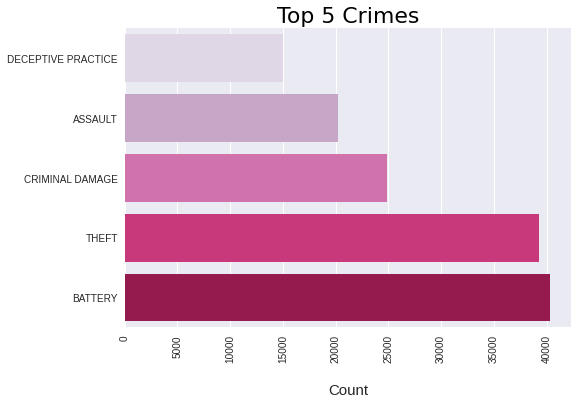

In [15]:
# Set the style of the plot first
plt.style.use('seaborn')
# Filter out the Top 5 crimes
top_5_crimes = df['Primary Type'].value_counts().sort_values(ascending=False).head()
temp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head()
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Primary Type', data=temp, palette="PuRd")
# Work on the aestehtic appeal of the plot
plt.title("Top 5 Crimes", fontdict = {'fontsize': 22, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCount", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

In [16]:
temp.head()
temp.columns=['Crime','Number']
temp.index=[0,1,2,3,4]
temp['co-ordinates']=[1,2,3,4,5]
temp.head()

,Crime,Number,co-ordinates
0,DECEPTIVE PRACTICE,15033,1
1,ASSAULT,20254,2
2,CRIMINAL DAMAGE,24847,3
3,THEFT,39258,4
4,BATTERY,40314,5


<a id='q2'></a>
# Top 5 Crimes in Chicago in 2021
 1.Battery
 
 2.Theft
 
 3.Criminal Damage
 
 4.Assault
 
 5.Deceptive Practice

<a id='q3'></a>
# Modifying the Date Column to a Python Format

In [21]:
# Testing out the time and date conversion for one entry
t = df['Date'][20]
print(t)
s1 = t[:11] 
print(s1)
s2 = t[11:]
print(s2)

print(s2)
hr = s2[:2]
mins = s2[3:5]
sec = s2[6:8]
time_frame = s2[9:]
if(time_frame == 'PM'):
    if (int(hr) != 12):
        hr = str(int(hr) + 12)
else:
    if(int(hr) == 12):
        hr = '00'

print(hr, mins, sec)

04/17/2021 05:05:00 PM
04/17/2021 
05:05:00 PM
05:05:00 PM
17 05 00


In [22]:
# Time Conversion Function
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [26]:
# Using apply() of pandas to apply time_convert on every row of the Date column
df['Date'] = df['Date'].apply(time_convert)

<a id='q4'></a>
# Create a new column Month

In [27]:
def month(x):
    return x.strftime("%B")
df['Month'] = df['Date'].apply(month)

In [28]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month
0,12445124,JE328077,2021-08-05 22:00:00,033XX S LEAVITT ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,0,0,...,59.0,05,1162228.0,1882544.0,2021,08/12/2021 05:02:52 PM,41.833362,-87.680254,"(41.833362337, -87.680254373)",August
1,12541099,JE445417,2021-11-14 22:58:00,003XX N LAVERGNE AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,1,0,...,25.0,15,1142984.0,1901704.0,2021,11/21/2021 03:48:03 PM,41.886320,-87.750388,"(41.886319707, -87.750387937)",November
2,12344992,JE204888,2021-04-16 00:00:00,011XX W 50TH ST,0820,THEFT,$500 AND UNDER,APARTMENT,0,0,...,61.0,06,1169689.0,1871646.0,2021,04/23/2021 04:51:47 PM,41.803298,-87.653195,"(41.8032982, -87.653195042)",April
3,12345838,JE205622,2021-03-03 18:20:00,012XX N WELLS ST,0820,THEFT,$500 AND UNDER,STREET,0,0,...,8.0,06,1174488.0,1908479.0,2021,04/23/2021 04:49:41 PM,41.904265,-87.634496,"(41.904265132, -87.634495504)",March
4,12444222,JE326942,2021-08-05 11:00:00,044XX N BROADWAY,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,...,3.0,08B,1168547.0,1929701.0,2021,08/12/2021 05:02:52 PM,41.962630,-87.655702,"(41.962630057, -87.655702088)",August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207886,12326753,JE182840,2021-03-29 04:20:00,110XX S AVENUE F,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,0,0,...,52.0,04B,1203514.0,1832431.0,2021,10/18/2022 04:47:50 PM,41.694888,-87.530487,"(41.694888492, -87.530487212)",March
207888,12547649,JE453182,2021-11-22 06:16:00,079XX S ABERDEEN ST,1020,ARSON,BY FIRE,APARTMENT,0,0,...,71.0,09,1170362.0,1852142.0,2021,10/18/2022 04:50:24 PM,41.749762,-87.651294,"(41.749762233, -87.651294144)",November
207890,12566165,JE475761,2021-06-09 00:00:00,006XX W JACKSON BLVD,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,COMMERCIAL / BUSINESS OFFICE,1,0,...,28.0,11,1172276.0,1898889.0,2021,10/19/2022 04:49:39 PM,41.877999,-87.642904,"(41.87799875, -87.642904147)",June
207902,26215,JE340482,2021-08-17 14:30:00,048XX W FULTON ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,1,0,...,25.0,01A,1143874.0,1901492.0,2021,10/06/2022 04:47:03 PM,41.885721,-87.747125,"(41.885721317, -87.747124924)",August


In [29]:
# Frequency of the most occuring crimes over the year 2018
theft_dict ={} # dictionary
battery_dict = {}
crim_dam = {}
assault = {}
dec_prac = {}

months = df["Month"].unique()
for month in months :
    theft_dict[month]=0
    battery_dict[month]=0
    crim_dam[month]=0
    assault[month]=0
    dec_prac[month]=0

for elem in df[df["Primary Type"]=="THEFT"]["Month"]:
    if elem in theft_dict.keys():
        theft_dict[elem] += 1

for elem in df[df["Primary Type"]=="BATTERY"]["Month"]:
    if elem in battery_dict.keys():
        battery_dict[elem] += 1
        
for elem in df[df["Primary Type"]=="CRIMINAL DAMAGE"]["Month"]:
    if elem in crim_dam.keys():
        crim_dam[elem] += 1
        
for elem in df[df["Primary Type"]=="ASSAULT"]["Month"]:
        if elem in assault.keys():
            assault[elem] += 1
        
for elem in df[df["Primary Type"]=="DECEPTIVE PRACTICE"]["Month"]:
    if elem in dec_prac.keys():
        dec_prac[elem] += 1
        
        
# Let's order the above dictionaries for proper plotting
months=['January','February','March','April','May','June','July','August','September','October','November','December']
theft_list = [(k,theft_dict[k]) for k in months]
battery_list = [(k,battery_dict[k]) for k in months]
crim_dam_list = [(k,crim_dam[k]) for k in months]
assault_list = [(k,assault[k]) for k in months]
dec_prac_list = [(k,dec_prac[k]) for k in months]

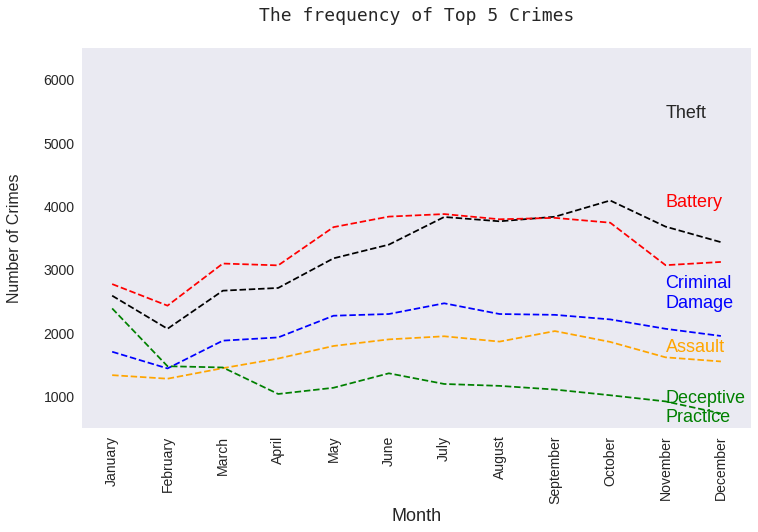

In [30]:
# Plotting the graphs

plt.style.use('seaborn-dark')
#sns.set(rc={'axes.facecolor':'A0D7E6', 'figure.facecolor':'ffffff'})
fig, ax = plt.subplots(figsize=(12,7))

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

# Setting the ticks only on the bottom and the left of the graph
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(500, 6500)

x = [z[0] for z in theft_list]
# print(x)
y = [z[1] for z in theft_list]
ax.plot(x,y, color="black")
ax.lines[0].set_linestyle("--")

x = [z[0] for z in battery_list]
y = [z[1] for z in battery_list]
ax.plot(x,y, color="red")
ax.lines[1].set_linestyle("--")
x = [z[0] for z in crim_dam_list]
y = [z[1] for z in crim_dam_list]
ax.plot(x,y, color="blue")
ax.lines[2].set_linestyle("--")

x = [z[0] for z in assault_list]
y = [z[1] for z in assault_list]
ax.plot(x,y, color="orange")
ax.lines[3].set_linestyle("--")

# x,y = zip(*dec_prac.items())
x = [z[0] for z in dec_prac_list]
y = [z[1] for z in dec_prac_list]
ax.plot(x,y, color="green")
ax.lines[4].set_linestyle("--")

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.text(10,5400,"Theft",fontsize=18)
plt.text(10,4000,"Battery",fontsize=18,color="red")
plt.text(10,2400,"Criminal\nDamage",fontsize=18,color="blue")
plt.text(10,1700,"Assault",fontsize=18,color="orange")
plt.text(10,600,"Deceptive\nPractice",fontsize=18,color="green")

ax.set_title("The frequency of Top 5 Crimes\n",fontname="monospace", fontsize=18)
ax.set_xlabel("Month", fontsize=18)
ax.set_ylabel("Number of Crimes\n", fontsize=16)
    
plt.show()

# Arrests of the state of Chicago

<a id='q5'></a>
# The probability of arrest of Chicago

In [31]:
l = df["Arrest"].value_counts()
false = l[0]
true = l[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("The percentage of no arrests of all reported crimes is  :",false/(false+true)*100)

The percentage of no arrests of all reported crimes is  : 87.70270537515327


<a id='q6'></a>
# Distribution of arrests across the months

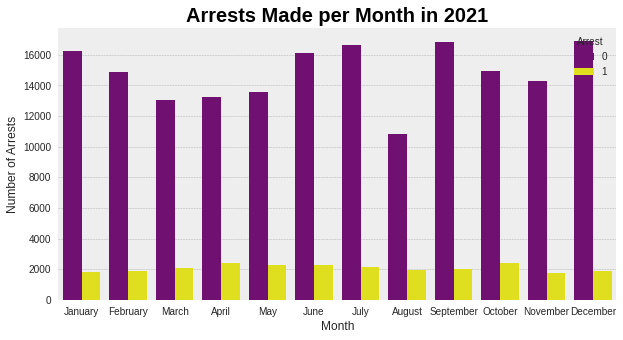

In [32]:
# How are arrests spread out across the months
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df[['Month','Arrest']],
                   palette=['Purple', 'Yellow'])
months = ['January','February','March','April','May','June','July',
             'August','September','October','November','December']    

ax.set(title='Arrests Made per Month in 2021', xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
plt.title('Arrests Made per Month in 2021', fontdict={'fontsize': 20, 'color': 'black'}, weight="bold")
plt.show()

<a id='q7'></a>
# Crime vs Time

# Distribution of crimes across the months

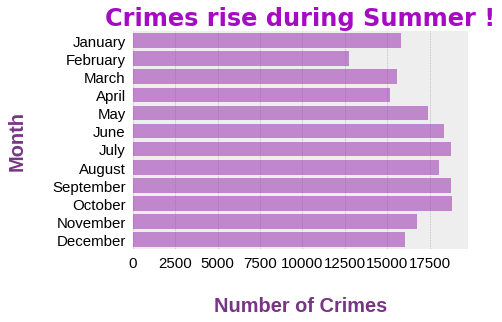

In [34]:
# Code to plot
sns.countplot(y='Month', data=df, palette=["#a60ac4"], order=['January', 'February', 'March', 'April', 'May', 'June', "July", 'August', 'September', 'October', 'November', 'December'], alpha=0.5)
# Aesthetic appeal of the plot 
plt.title("Crimes rise during Summer !", fontdict={'fontsize': 24, 'color': '#a60ac4', 'fontname':'Agency FB'}, weight="bold")
plt.ylabel("Month\n", fontdict={'fontsize': 20}, weight="bold", color="#763683")
plt.xlabel("\nNumber of Crimes", fontdict={'fontsize': 20}, weight="bold", color="#763683")
plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15, color='black')
plt.show()

# Create a new column "Hour" [24 hour format]

In [35]:
def hour(x):
    return x.strftime("%H")
df['Hour_Day'] = df['Date'].apply(hour)

<a id='q8'></a>
# What are the most unsafest hours ?

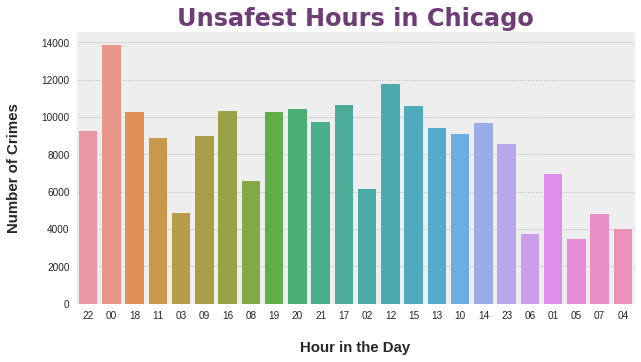

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour_Day', data=df)
# ploting
plt.title("Unsafest Hours in Chicago", fontdict={'fontsize': 24, 'color': '#6e3d78','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")
plt.show()

<a id='q9'></a>
# Is your house safe from a burglary during the day ?

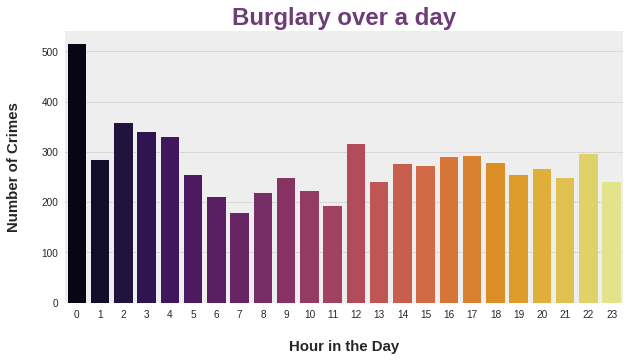

In [37]:
# analyse only for burglary
burglary_df = df[df['Primary Type']=='BURGLARY']
hours = [int(x) for x in list(burglary_df['Hour_Day'].unique())]
hours = sorted(hours)

bur_cri = list(burglary_df['Hour_Day'].value_counts().sort_index())

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=hours, y=bur_cri, palette='inferno')

# ploting
plt.title("Burglary over a day", fontdict={'fontsize': 24, 'color': '#6e3d78'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")
plt.show()

<a id='q10'></a>
# Visualize a Crime Pattern for 24 hours 

Enter the crime you wish to see the 24 hour pattern off >> BATTERY


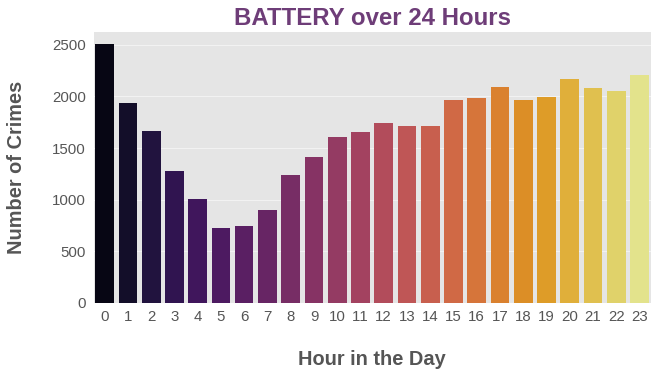

In [38]:
plt.style.use('ggplot')  # An analysis of the 24 hour pattern for crimes                                                               
c = input("Enter the crime you wish to see the 24 hour pattern off >> ")

crime_df = df[df['Primary Type']== c.upper()]
hours = [int(x) for x in list(crime_df['Hour_Day'].unique())]
hours = sorted(hours)

h_cri = list(crime_df['Hour_Day'].value_counts().sort_index())

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=hours, y=h_cri, palette='inferno')

# ploting
tit = c.upper()+" over 24 Hours"
plt.title(tit, fontdict={'fontsize': 24, 'color': '#6e3d78'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 20}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 20}, weight="bold")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# District

In [39]:
crimes = df['District'].unique()
crimes

array([ 9., 15., 18., 19.,  5.,  6.,  8., 10., 25.,  1.,  4., 22., 20.,
        2., 24., 12., 11., 17., 14., 16.,  3.,  7., 31.])

In [40]:
# the Top 5 criminal districts
top_5_District = df['District'].value_counts().sort_values(ascending=False).head()
top_5_District

6.0     13312
11.0    12906
8.0     12571
4.0     12200
25.0    10601
Name: District, dtype: int64

<a id='q11'></a>
# Crime vs Locations

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


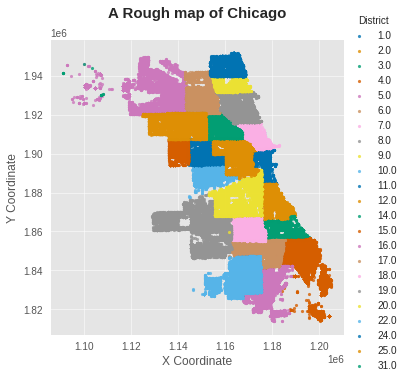

In [41]:
# map of Chicago with the help of X and Y co-ordinates
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df,
           fit_reg=False, 
           hue="District",
           palette='colorblind',
           height=5,
           scatter_kws={"marker": "+", 
                        "s": 10})
ax = plt.gca()
ax.set_title("A Rough map of Chicago\n", fontdict={'fontsize': 15}, weight="bold")
plt.show()

<a id='q12'></a>
# Most Common Occurences per District

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


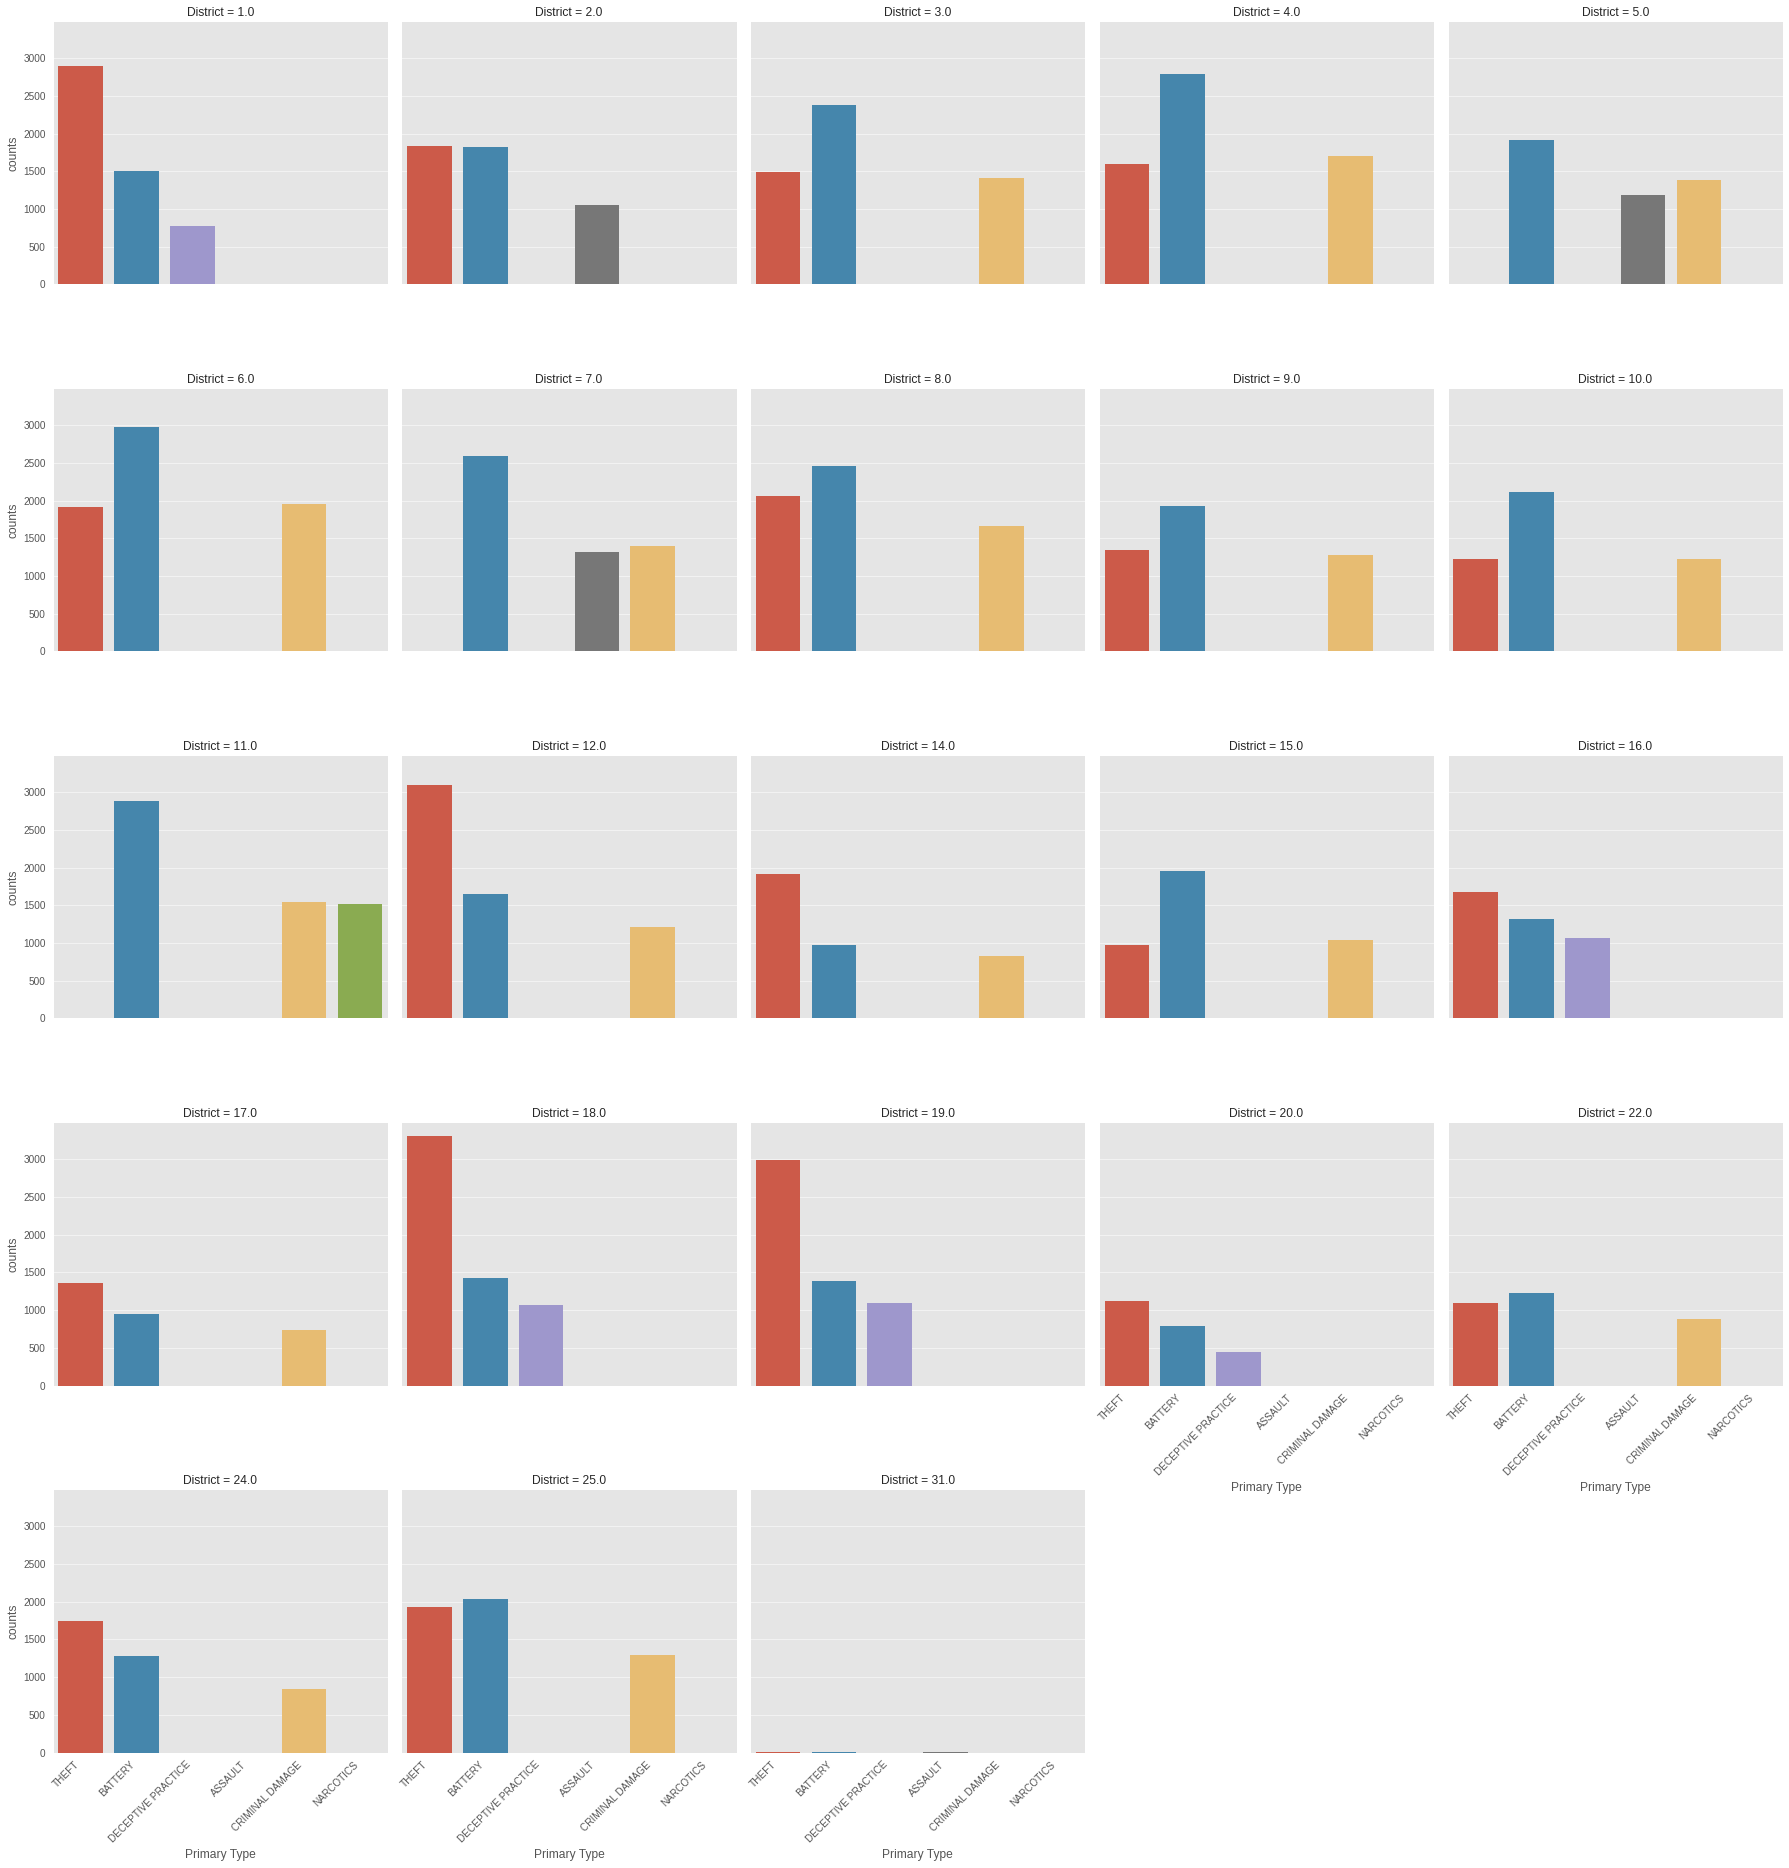

In [42]:
# location attributes = ['Location Description','Beat','District', 'Ward', 'Community Area','X Coordinate','Y Coordinate', 'Latitude', 'Longitude','Location']
%matplotlib inline
top = df.groupby(['District', 'Primary Type']).size().reset_index(name='counts').groupby('District').apply(lambda x: x.sort_values('counts',ascending=False).head(3))

# factor plot to make multiple plots
g =sns.catplot("Primary Type", y='counts', col="District", col_wrap=5,
                   data=top, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45, ha='right')

plt.subplots_adjust(hspace=0.4)

<a id='q13'></a>
# Which region is a given Crime concentrated in ? 

Enter the crime you wish to see the concentration of in the city >> BATTERY


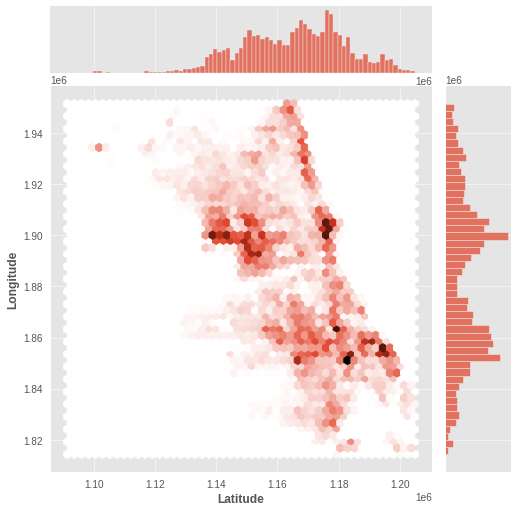

In [43]:
c = input("Enter the crime you wish to see the concentration of in the city >> ")    #take the crime as an input 
crime_df = df[df['Primary Type']==c.upper()]

sns.jointplot(x=crime_df['X Coordinate'].values, y=crime_df['Y Coordinate'].values, height=7, kind='hex')

plt.xlabel("Latitude", fontdict={'fontsize': 12}, weight='bold')
plt.ylabel("Longitude", fontdict={'fontsize': 12}, weight="bold")
plt.show()

<a id='q14'></a>
# Visualizing Narcotics (To get an understanding of the most prevalent type of drugs in the area)

In [44]:
narc=df[df['Primary Type']=='NARCOTICS']
narc_data=pd.DataFrame({"Counts":narc['Description'].value_counts(),"Description":narc['Description'].value_counts().index})
narc_data.reset_index(inplace=True)
narc_data=narc_data.drop(columns=['index'],axis=1)
narc_data.head()

,Counts,Description
0,873,POSSESS - HEROIN (WHITE)
1,520,FOUND SUSPECT NARCOTICS
2,398,POSSESS - CANNABIS MORE THAN 30 GRAMS
3,378,POSSESS - CRACK
4,349,MANUFACTURE / DELIVER - HEROIN (WHITE)


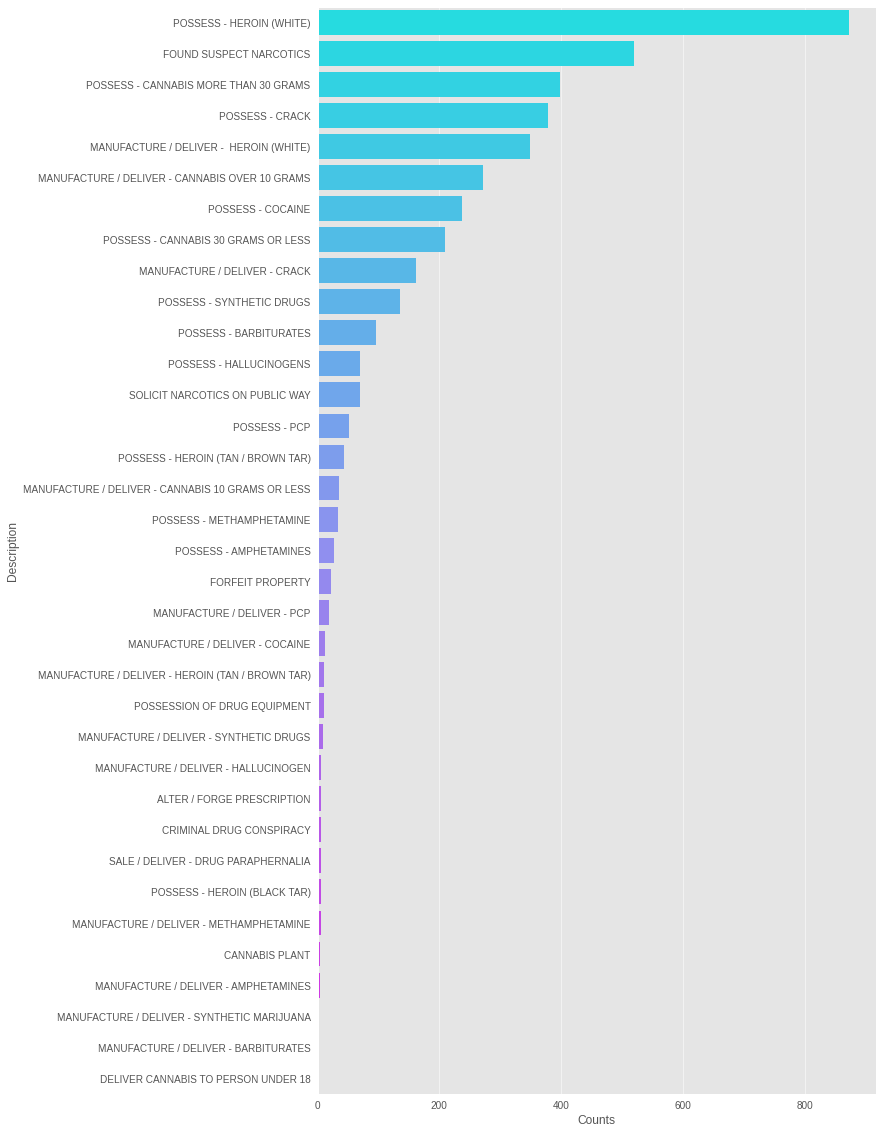

In [45]:
plt.figure(figsize=(10,20))
sns.barplot(y="Description", x= "Counts", data=narc_data, palette="cool")

<a id='q16'></a>
# Classifying Crime Hotspots

In [46]:
def day(x):
    return x.strftime("%A")
df['Day'] = df['Date'].apply(day)

In [47]:
# Make a new dataset for the predictions
cols = ['Date', 'Block', 'Location Description', 'Domestic', 'District','Month', 'Primary Type']
new_df = df[cols]
new_df.head()

,Date,Block,Location Description,Domestic,District,Month,Primary Type
0,2021-08-05 22:00:00,033XX S LEAVITT ST,RESIDENCE - GARAGE,0,9.0,August,BURGLARY
1,2021-11-14 22:58:00,003XX N LAVERGNE AVE,STREET,0,15.0,November,WEAPONS VIOLATION
2,2021-04-16 00:00:00,011XX W 50TH ST,APARTMENT,0,9.0,April,THEFT
3,2021-03-03 18:20:00,012XX N WELLS ST,STREET,0,18.0,March,THEFT
4,2021-08-05 11:00:00,044XX N BROADWAY,APARTMENT,1,19.0,August,BATTERY


In [48]:
def new_hour(x):
    return int(x.strftime("%H"))
new_df['Hour'] = new_df['Date'].apply(new_hour)

<ipython-input-48-125a084fd1ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Hour'] = new_df['Date'].apply(new_hour)


In [49]:
def new_day(x):
    return int(x.strftime("%w"))
new_df['Day'] = new_df['Date'].apply(new_day)

<ipython-input-49-67c2dc2de344>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Day'] = new_df['Date'].apply(new_day)


In [50]:
def new_month(x):
    return int(x.strftime("%m"))
new_df['Month_num'] = new_df['Date'].apply(new_month)

<ipython-input-50-194561130f81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Month_num'] = new_df['Date'].apply(new_month)


In [51]:
# replacing in Domestic (Let's use Label Encoding)
new_df['Location Description'] = new_df['Location Description'].astype('category')
new_df['Domestic'] = new_df['Domestic'].astype('category')
new_df['Location_Cat'] = new_df['Location Description'].cat.codes
new_df['Domestic_Cat'] = new_df['Domestic'].cat.codes
new_df.head()

<ipython-input-51-13ab6a29795e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Location Description'] = new_df['Location Description'].astype('category')
<ipython-input-51-13ab6a29795e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Domestic'] = new_df['Domestic'].astype('category')
<ipython-input-51-13ab6a29795e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Date,Block,Location Description,Domestic,District,Month,Primary Type,Hour,Day,Month_num,Location_Cat,Domestic_Cat
0,2021-08-05 22:00:00,033XX S LEAVITT ST,RESIDENCE - GARAGE,0,9.0,August,BURGLARY,22,4,8,99,0
1,2021-11-14 22:58:00,003XX N LAVERGNE AVE,STREET,0,15.0,November,WEAPONS VIOLATION,22,0,11,112,0
2,2021-04-16 00:00:00,011XX W 50TH ST,APARTMENT,0,9.0,April,THEFT,0,5,4,17,0
3,2021-03-03 18:20:00,012XX N WELLS ST,STREET,0,18.0,March,THEFT,18,3,3,112,0
4,2021-08-05 11:00:00,044XX N BROADWAY,APARTMENT,1,19.0,August,BATTERY,11,4,8,17,1


In [52]:
def day_conv(x):
    return x.strftime("%a")
new_df['Day Name'] = new_df['Date'].apply(day_conv)

<ipython-input-52-92bc86cd5b68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Day Name'] = new_df['Date'].apply(day_conv)


<a id='q15'></a>
# Visualizing With Heatmaps

In [57]:
# Gang Activity
gang_crimes = ['NARCOTICS', 'HOMICIDE', 'WEAPONS VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION', 'KIDNAPPING', 'BURGLARY']
gang_df = new_df[new_df['Primary Type'].isin(gang_crimes)]
gang_df.shape

(20704, 13)

In [ ]:
gang_df = gang_df[gang_df['Domestic']=='False'] # Domestic crimes are not usually gang crimes
gang_df.shape

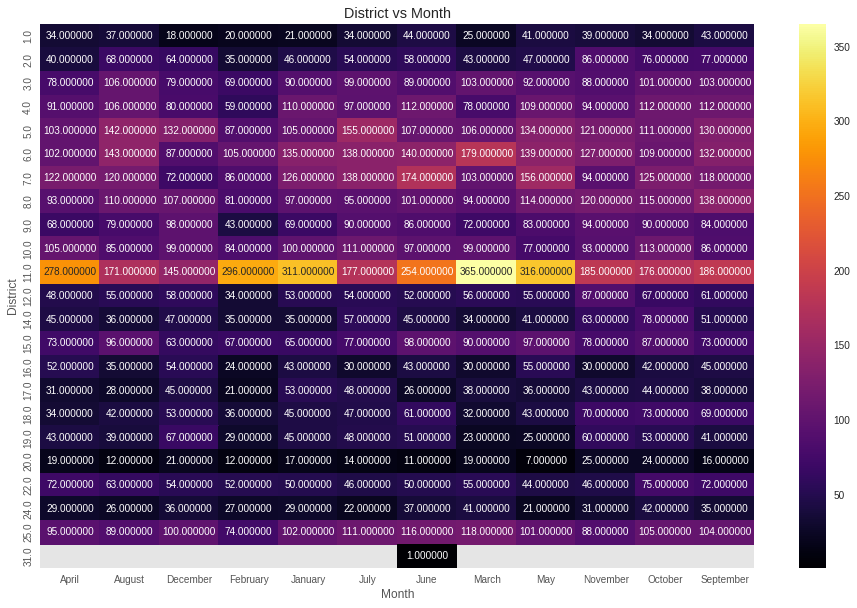

In [58]:
# Plotting for District vs Month in Gang crimes
cri3 = gang_df.groupby(['District','Month'],as_index=False).agg({'Primary Type':"count"})
cri3.columns

cri3 = cri3.pivot("District", "Month", "Primary Type")


plt.figure(figsize = (16,10))
plt.title("District vs Month")
with sns.axes_style("white"):
    sns.heatmap(cri3, mask=cri3.isnull(), cmap="inferno", annot=True, fmt="f")

In [ ]:
gang_df2 = new_df[new_df['Primary Type'].isin(gang_crimes)]
gang_df2 = gang_df2[gang_df2['Domestic']=='False'] # Domestic crimes are not usually gang crimes
del [gang_df2['Date'],gang_df2['Block'],gang_df2['Domestic'],gang_df2['Domestic_Cat']]

gang_df2['Primary Type'] = gang_df2['Primary Type'].astype('category')
gang_df2['Primary Type'] = gang_df2['Primary Type'].cat.codes

gang_df2['Location Description'] = gang_df2['Location Description'].astype('category')
gang_df2['Location Description'] = gang_df2['Location Description'].cat.codes

del [gang_df2['Day Name'], gang_df2['Month']]
print(gang_df2.head())
print("\nShape of dataset :",gang_df2.shape)

<a id='q18'></a>
# Using Supervised Machine Learning to Predict Crime Hotspots

In [60]:
# Creating our explicit dataset
cri4 = new_df.groupby(['Month_num','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
cri4 = cri4.sort_values(by=['District'], ascending=False)
cri4.head()

,Month_num,Day,District,Hour,Primary Type
17675,6,0,31.0,9,1
26826,8,4,31.0,0,1
34465,10,5,31.0,7,1
34464,10,5,31.0,2,1
497,1,0,31.0,0,1


In [61]:
cri4 = cri4[['Month_num','Day','Hour','Primary Type','District']]
cri4.head()
cri4.shape

(42047, 5)

In [62]:
print(cri4['Primary Type'].max(),cri4['Primary Type'].min())

32 1


In [63]:
print("Average no. of crime per month per day per district per hour :",cri4['Primary Type'].sum()/42774,".")

Average no. of crime per month per day per district per hour : 4.728666947210923 .


In [64]:
# Feature Engineer and create a new feature
def crime_rate_assign(x):
    if(x<=7):
        return 0
    elif(x>7 and x<=15):
        return 1
    else:
        return 2
cri4['Alarm'] = cri4['Primary Type'].apply(crime_rate_assign)
cri4 = cri4[['Month_num','Day','Hour','District','Primary Type','Alarm']]
cri4.head()

,Month_num,Day,Hour,District,Primary Type,Alarm
17675,6,0,9,31.0,1,0
26826,8,4,0,31.0,1,0
34465,10,5,7,31.0,1,0
34464,10,5,2,31.0,1,0
497,1,0,0,31.0,1,0


These are the categories we have specified :

     0 : Low Alarm
     1 : Medium Alarm
     2 : High Alarm

<a id='conclusions'></a>
## Conclusions

By looking at crime statistics, we were able to find answers to a number of questions we had concerning crimes in Chicago. We used a methodical approach to achieve our objectives. We found responses to questions like which crimes were committed most frequently in 2021, the riskiest times of day, the riskiest places, the most frequent gang-related activity in Chicago, and more. We also learned the startling fact that no arrests were made in 87% of the occurrences. However, we may be more optimistic and state that 13% of the crimes committed resulted in arrests within the first 24 hours of the incident being reported because the information acquired was based on first-hand accounts!